#Cliques
Cliques is a problem in the graph theory to find cliques which has complete connectivity among K nodes in the clique.

The first term of the equation is a constraint for select K nodes.The 2nd term is to find the complete graph among these nodes. If you can find clique K the total cost function will be E=0

<img src="https://github.com/mdrft/Wildqat/blob/master/examples_ja/img/006_0.png?raw=1">

##Example
Let's find clique 3 from 6 node network graph

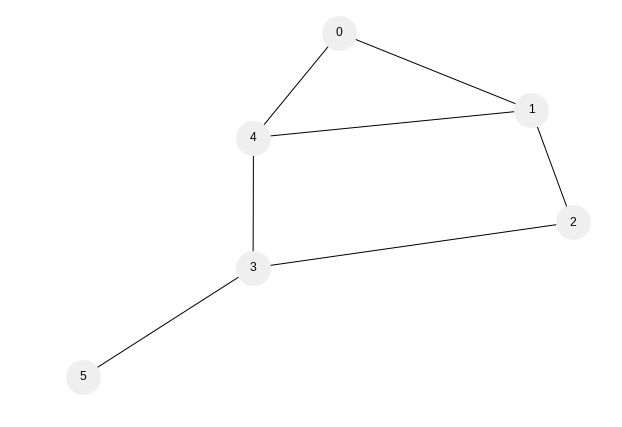

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}

G = nx.Graph()
G.add_nodes_from(nx.path_graph(6))
G.add_edges_from([(0,1),(0,4),(1,2),(1,4),(2,3),(3,4),(3,5)])
nx.draw(G, **options)

This time the number of nodes are 6 and prepare 6 qubits. And we try to find clique 3 and put 3 into K in the equation.

<img src="https://github.com/mdrft/Wildqat/blob/master/examples_ja/img/006_2.png?raw=1">

This time we try solve using some matrix to prepare the 1st and 2nd term separetely.

In [0]:
!pip install -U blueqat

In [0]:
import blueqat.wq as wq
import numpy as np
a = wq.Opt()

Let's see x0+x1+x2+x3+x4+x5 and all these coefficients are 1 and we prepare this as diagonal matrix

In [0]:
A = [1,1,1,1,1,1]
print(np.diag(A))

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


and using this A calculate -6A+A^2 using blueqat's function

In [0]:
print(wq.sqr(A))

[[1 2 2 2 2 2]
 [0 1 2 2 2 2]
 [0 0 1 2 2 2]
 [0 0 0 1 2 2]
 [0 0 0 0 1 2]
 [0 0 0 0 0 1]]


by adding these we can get the 1st term of the equation

In [0]:
matrix1 = -6*np.diag(A)+wq.sqr(A)
print(matrix1)

[[-5  2  2  2  2  2]
 [ 0 -5  2  2  2  2]
 [ 0  0 -5  2  2  2]
 [ 0  0  0 -5  2  2]
 [ 0  0  0  0 -5  2]
 [ 0  0  0  0  0 -5]]


and we can get the 2nd term simply creating QUBO by hand. This time we try use B=0.8

In [0]:
B = 0.8
matrix2 = B*np.asarray([[0,-1,0,0,-1,0],[0,0,-1,0,-1,0],[0,0,0,-1,0,0],[0,0,0,0,-1,-1],[0,0,0,0,0,0],[0,0,0,0,0,0]])
print(matrix2)

[[ 0.  -0.8  0.   0.  -0.8  0. ]
 [ 0.   0.  -0.8  0.  -0.8  0. ]
 [ 0.   0.   0.  -0.8  0.   0. ]
 [ 0.   0.   0.   0.  -0.8 -0.8]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]]


Finally we get qubo by adding these matrix

In [0]:
a.qubo = matrix1 + matrix2
print(a.qubo)
a.sa()

[[-5.   1.2  2.   2.   1.2  2. ]
 [ 0.  -5.   1.2  2.   1.2  2. ]
 [ 0.   0.  -5.   1.2  2.   2. ]
 [ 0.   0.   0.  -5.   1.2  1.2]
 [ 0.   0.   0.   0.  -5.   2. ]
 [ 0.   0.   0.   0.   0.  -5. ]]
1.4822120666503906


[1, 1, 0, 0, 1, 0]

We get acutally created QUBO , solving time and final answer.
0th,2nd,4th qubit is 1. We get clique 3 among 0th, 2nd, 4th.

If you want to check the Jij matrix finanlly created,


In [0]:
print(a.J)

[[-0.4  0.3  0.5  0.5  0.3  0.5]
 [ 0.  -0.6  0.3  0.5  0.3  0.5]
 [ 0.   0.  -0.4  0.3  0.5  0.5]
 [ 0.   0.   0.  -0.6  0.3  0.3]
 [ 0.   0.   0.   0.  -0.6  0.5]
 [ 0.   0.   0.   0.   0.  -0.2]]


Let's check the time evolution of cost function

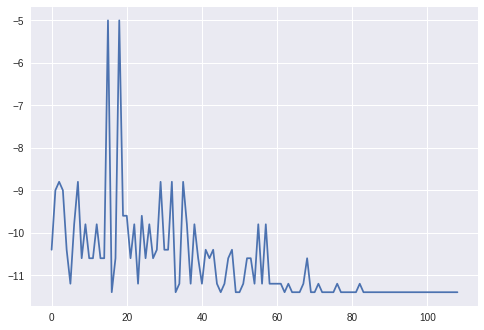

In [0]:
a.plot()